#### Notebook Description

__02 contains further data cleaning and preprocessing, and some early model testing.__


## Index Links
- [Basic Linear Regression](#Basic-Linear-Regression)
- [Basic Ridge and Lasso Regression](#Basic-Ridge-and-Lasso-Regression)
- [Data Exploration](#Data-Exploration)
- [Feature Scaling](#Feature-Scaling)
- [Categorical Data Replacement](#Categorical-Data-Replacement)
- [Final Data Preparation](#Final-Data-Preparation)


In [1528]:
# imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import linregress
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [1529]:
# import cleaned CSV's
train = pd.read_csv('../datasets/train_preprocessed.csv', index_col=0)
test = pd.read_csv('../datasets/test_preprocessed.csv', index_col=0)

In [1530]:
train.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,TotRms AbvGrd Total Bsmt SF,TotRms AbvGrd 1st Flr SF,TotRms AbvGrd Bedroom AbvGr,TotRms AbvGrd TotRms AbvGrd,Total Bsmt SF 1st Flr SF,Total Bsmt SF Bedroom AbvGr,Total Bsmt SF TotRms AbvGrd,1st Flr SF Bedroom AbvGr,1st Flr SF TotRms AbvGrd,Bedroom AbvGr TotRms AbvGrd
0,109,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,AllPub,...,4350.0,4350.0,18.0,36.0,525625.0,2175.0,4350.0,2175.0,4350.0,18.0
1,544,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,7304.0,7304.0,32.0,64.0,833569.0,3652.0,7304.0,3652.0,7304.0,32.0
2,153,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,5285.0,5285.0,15.0,25.0,1117249.0,3171.0,5285.0,3171.0,5285.0,15.0
3,318,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,2688.0,5208.0,21.0,49.0,285696.0,1152.0,2688.0,2232.0,5208.0,21.0
4,255,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,4056.0,4986.0,18.0,36.0,561756.0,2028.0,4056.0,2493.0,4986.0,18.0


In [1531]:
train.shape

(2051, 100)

In [1532]:
test.shape

(879, 99)

In [1533]:
# remove the Id column - not needed for now, and create a backup
id_backup = test['Id']
train = train.drop(['Id'], axis=1)

## Basic Linear Regression

We will use the numerical features with the largest correlations to sale price.  A train/test split will not be used, the score will be uploaded to Kaggle for a baseline to compare future models.

In [1534]:
corrs = train.corr()
corrs['SalePrice'] = corrs['SalePrice'].abs()
corrs['SalePrice'].sort_values(ascending=False)

SalePrice                      1.000000
Overall Qual                   0.800207
Garage Cars Gr Liv Area        0.793274
Garage Cars Total Bsmt SF      0.767335
Garage Cars 1st Flr SF         0.760121
Garage Area Gr Liv Area        0.754659
Garage Cars TotRms AbvGrd      0.720034
Garage Cars TotRms AbvGrd.1    0.720034
Garage Area TotRms AbvGrd.1    0.719328
Garage Area TotRms AbvGrd      0.719328
Garage Area 1st Flr SF         0.705365
Garage Area Total Bsmt SF      0.692389
Garage Cars Garage Area        0.690596
TotRms AbvGrd Total Bsmt SF    0.650758
Total Bsmt SF TotRms AbvGrd    0.650758
Gr Liv Area 1st Flr SF         0.629107
TotRms AbvGrd 1st Flr SF       0.626405
1st Flr SF TotRms AbvGrd       0.626405
Gr Liv Area Total Bsmt SF      0.624888
Gr Liv Area TotRms AbvGrd      0.615463
Gr Liv Area TotRms AbvGrd.1    0.615463
Garage Area Bedroom AbvGr      0.575434
Year Built                     0.571849
Garage Cars Bedroom AbvGr      0.566818
Year Remod/Add                 0.550370


##### Feature selection

We will use a small sample of the features that have the highest correlation with sale price on the training data set.

In [1535]:
features = ['Overall Qual', 'Garage Cars Gr Liv Area', 'Garage Cars Total Bsmt SF', 'Garage Area Gr Liv Area']

In [1536]:
X = train[features]
y = train['SalePrice']

model = LinearRegression()
model = model.fit(X, y)
y_pred = model.predict(X)
r2_score(y_pred, y)

0.7154249828754677

In [1537]:
# predicting the target values in the kaggle competition dataset using the simple baseline model
X_kag = test[features]
kag_pred = model.predict(X_kag)

In [1538]:
sub1_linear_regr_basic = test.copy()
sub1_linear_regr_basic['SalePrice'] = kag_pred
sub1_linear_regr_basic = sub1_linear_regr_basic[['Id', 'SalePrice']]
sub1_linear_regr_basic['SalePrice'].head()

0    155596.337640
1    190370.368076
2    197268.289172
3    139929.936310
4    185815.015429
Name: SalePrice, dtype: float64

In [1539]:
sub1_linear_regr_basic.head()

,Id,SalePrice
0,2658,155596.337640
1,2718,190370.368076
2,2414,197268.289172
3,1989,139929.936310
4,625,185815.015429


In [1540]:
sub1_linear_regr_basic.to_csv('../subs/sub1_linear_regr_basic.csv', index=False)

##### Results

Score results were not excellent.  There was only very basic intuition put into this model (selecting the variables with the strongest correlation), so there will be more improvement to go.

## Basic Ridge and Lasso Regression

We will create a train/test split this time to test model performance, and use a basic Ridge and Lasso regression test performance against our current dataset.  Linear regression will still be used for comparison.

In [1541]:
train_numonly = train.select_dtypes(include = ['int64', 'float64'])

In [1542]:
train_numonly.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,TotRms AbvGrd Total Bsmt SF,TotRms AbvGrd 1st Flr SF,TotRms AbvGrd Bedroom AbvGr,TotRms AbvGrd TotRms AbvGrd,Total Bsmt SF 1st Flr SF,Total Bsmt SF Bedroom AbvGr,Total Bsmt SF TotRms AbvGrd,1st Flr SF Bedroom AbvGr,1st Flr SF TotRms AbvGrd,Bedroom AbvGr TotRms AbvGrd
0,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,...,4350.0,4350.0,18.0,36.0,525625.0,2175.0,4350.0,2175.0,4350.0,18.0
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,...,7304.0,7304.0,32.0,64.0,833569.0,3652.0,7304.0,3652.0,7304.0,32.0
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,...,5285.0,5285.0,15.0,25.0,1117249.0,3171.0,5285.0,3171.0,5285.0,15.0
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,...,2688.0,5208.0,21.0,49.0,285696.0,1152.0,2688.0,2232.0,5208.0,21.0
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,...,4056.0,4986.0,18.0,36.0,561756.0,2028.0,4056.0,2493.0,4986.0,18.0


In [1543]:
test_numonly = test.select_dtypes(include = ['int64', 'float64'])

In [1544]:
features = [col for col in train_numonly.columns if col != 'Id']
features = [col for col in features if col != 'PID']
features = [col for col in features if col != 'SalePrice']
X = train[features]
X_kag = test[features]
y = train['SalePrice']
test['SalePrice'] = 0
y_kag = test['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [1545]:
ss = StandardScaler()
ss.fit(X)

# transform the data
X_train = pd.DataFrame(ss.transform(X_train), columns= X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns= X_train.columns)
X_kag = pd.DataFrame(ss.transform(X_kag), columns= X_train.columns)

In [1546]:
X_train.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,TotRms AbvGrd Total Bsmt SF,TotRms AbvGrd 1st Flr SF,TotRms AbvGrd Bedroom AbvGr,TotRms AbvGrd TotRms AbvGrd,Total Bsmt SF 1st Flr SF,Total Bsmt SF Bedroom AbvGr,Total Bsmt SF TotRms AbvGrd,1st Flr SF Bedroom AbvGr,1st Flr SF TotRms AbvGrd,Bedroom AbvGr TotRms AbvGrd
0,-0.630843,0.665743,-0.235165,-0.779944,0.396508,-0.885265,-1.625693,-0.565901,0.559369,-0.290653,...,-0.883152,-1.086055,-1.160709,-1.237726,-0.580909,-0.883765,-0.883152,-1.088354,-1.086055,-1.160709
1,-0.864413,0.212971,0.146093,-0.779944,-0.509102,-0.520671,-1.340402,-0.565901,0.099581,-0.290653,...,-0.225950,-0.406206,-0.744135,-0.348993,-0.284356,-0.623468,-0.225950,-0.825404,-0.406206,-0.744135
2,-0.864413,0.363895,-0.454722,-0.779944,1.302118,-0.388091,0.846833,-0.307699,0.316462,-0.290653,...,-0.219051,-0.222090,-0.744135,-0.348993,-0.179082,-0.617329,-0.219051,-0.665401,-0.222090,-0.744135
3,-0.864413,0.545004,-0.270323,-0.779944,1.302118,-0.354946,-1.102659,-0.244583,0.559369,-0.290653,...,-0.504191,-0.694036,-0.431705,-0.837796,-0.347163,-0.082002,-0.504191,-0.278418,-0.694036,-0.431705
4,0.537005,-1.749041,0.279608,0.622656,-0.509102,1.037140,0.894382,-0.565901,-0.958797,-0.290653,...,-0.994449,-0.585089,0.193155,0.228683,-0.844892,-1.150201,-0.994449,-0.669122,-0.585089,0.193155


### Testing Performance

### OLS Regression Performance

Below, we again use ordinary least squares regression with numerical features and cross-validate it against our testing dataset.

In [1547]:
lr = LinearRegression()
lr = lr.fit(X_train, y_train)
cross_val_score(lr, X_train, y_train, cv=3).mean()

0.4504400150770924

In [1548]:
lr.score(X_train, y_train)

0.8828247297577045

In [1549]:
lr.score(X_test, y_test)

0.8553666103256446

### Lasso Performance

Lasso regression performance appears quite similar.

In [1550]:
lasso = LassoCV(n_alphas=200)
lasso = lasso.fit(X_train, y_train)
cross_val_score(lasso, X_train, y_train, cv=3).mean()

0.46687235158856916

In [1551]:
lasso.score(X_train, y_train)

0.7246841933887087

In [1552]:
lasso.score(X_test, y_test)

0.761818700889986

### Ridge Performance

Ridge performance is very close to lasso, but notably with a small increase in overfitting.  The possible overfitting is identified when the R2 score for the test data is slightly farther apart from the training data R2 score.

In [1553]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
ridge = ridge.fit(X_train, y_train)
cross_val_score(ridge, X_train, y_train, cv=3).mean()

0.540515742558779

In [1554]:
ridge.score(X_train, y_train)

0.881427528636412

In [1555]:
ridge.score(X_test, y_test)

0.8582167558632919

### Scoring Submission

We will below submit the linear, lasso, and ridge models.

In [1556]:
# predicting the target values in the kaggle competition
kag_pred = lasso.predict(X_kag)
sub2_linear_impr = test.copy()
sub2_linear_impr['SalePrice'] = kag_pred
sub2_linear_impr = sub2_linear_impr[['Id', 'SalePrice']]
sub2_linear_impr['SalePrice'].head()

0    162270.019324
1    184186.100719
2    196020.052000
3    148526.443816
4    183629.350425
Name: SalePrice, dtype: float64

In [1557]:
sub2_linear_impr.head()

,Id,SalePrice
0,2658,162270.019324
1,2718,184186.100719
2,2414,196020.052000
3,1989,148526.443816
4,625,183629.350425


In [1558]:
sub2_linear_impr.to_csv('../subs/sub2_linear_impr.csv', index=False)

In [1559]:
# predicting the target values in the kaggle competition
kag_pred = lasso.predict(X_kag)
sub3_lasso_basic = test.copy()
sub3_lasso_basic['SalePrice'] = kag_pred
sub3_lasso_basic = sub3_lasso_basic[['Id', 'SalePrice']]
sub3_lasso_basic['SalePrice'].head()

0    162270.019324
1    184186.100719
2    196020.052000
3    148526.443816
4    183629.350425
Name: SalePrice, dtype: float64

In [1560]:
sub3_lasso_basic.to_csv('../subs/sub3_lasso_basic.csv', index=False)

In [1561]:
# predicting the target values in the kaggle competition
kag_pred = ridge.predict(X_kag)
sub4_ridge_basic = test.copy()
sub4_ridge_basic['SalePrice'] = kag_pred
sub4_ridge_basic = sub4_ridge_basic[['Id', 'SalePrice']]
sub4_ridge_basic['SalePrice'].head()

0    143400.087855
1    148046.384669
2    202520.011350
3    120807.643224
4    189678.307842
Name: SalePrice, dtype: float64

In [1562]:
sub4_ridge_basic.to_csv('../subs/sub4_ridge_basic.csv', index=False)

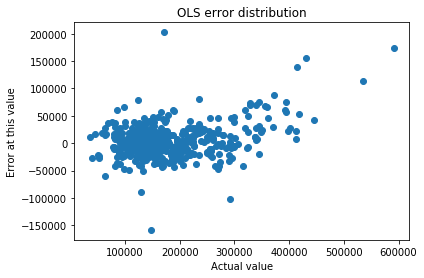

In [1563]:
y_pred = lr.predict(X_test)
errors = y_test - y_pred
plt.title('OLS error distribution')
plt.xlabel('Actual value')
plt.ylabel('Error at this value')
plt.scatter(y_test, errors);

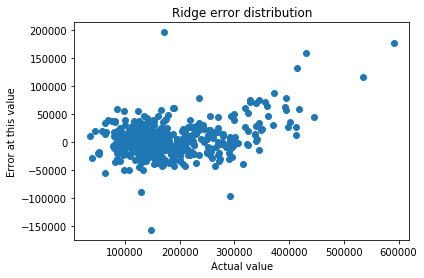

In [1564]:
y_pred = ridge.predict(X_test)
errors = y_test - y_pred
plt.title('Ridge error distribution')
plt.xlabel('Actual value')
plt.ylabel('Error at this value')
plt.scatter(y_test, errors);

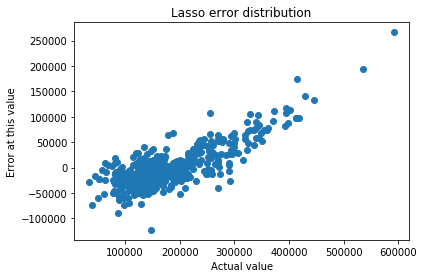

In [1565]:
y_pred = lasso.predict(X_test)
errors = y_test - y_pred
plt.title('Lasso error distribution')
plt.xlabel('Actual value')
plt.ylabel('Error at this value')
plt.scatter(y_test, errors);

#### Scoring Review

We have a large number of features available to us, almost 80, however most aren't introduced into this model.  In the above visualizations we can tell two clear results:  There is a significant outlier in the data, and our model is over-estimating housing values of high-cost housing.

Below a function is created to assist in iteratively scoring new models.  Elastic Net regression hasn't yet been used, but it will be added to the function for comparison.

In [1566]:
def scoring(X_train, y_train, X_test, y_test):
    # linear regression score
    lr = LinearRegression()
    lr = lr.fit(X_train, y_train)
    print('OLS CV score: ' + str(cross_val_score(lr, X_train, y_train, cv=3).mean()))
    print('OLS train score: ' + str(lr.score(X_train, y_train)))
    print('OLS test score: ' + str(lr.score(X_test, y_test)))
    
    # ridge score
    ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
    ridge = ridge.fit(X_train, y_train)
    print('Ridge CV score: ' + str(cross_val_score(ridge, X_train, y_train, cv=3).mean()))
    print('Ridge train score: ' + str(ridge.score(X_train, y_train)))
    print('Ridge test score: ' + str(ridge.score(X_test, y_test)))
    
    # lasso score
    lasso = LassoCV(n_alphas=200)
    lasso = lasso.fit(X_train, y_train)
    print('Lasso CV score: ' + str(cross_val_score(lasso, X_train, y_train, cv=3).mean()))
    print('Lasso train score: ' + str(lasso.score(X_train, y_train)))
    print('Lasso test score: ' + str(lasso.score(X_test, y_test)))
    
    # elastic score
    elastic = ElasticNetCV()
    elastic = elastic.fit(X_train, y_train)
    print('Elastic CV score: ' + str(cross_val_score(elastic, X_train, y_train, cv=3).mean()))
    print('Elastic train score: ' + str(elastic.score(X_train, y_train)))
    print('Elastic test score: ' + str(elastic.score(X_test, y_test)))
    return lr, ridge, lasso, elastic

In [1567]:
# test the function
lr, ridge, lasso, elastic = scoring(X_train, y_train, X_test, y_test)

OLS CV score: 0.4504400150770924
OLS train score: 0.8828247297577045
OLS test score: 0.8553666103256446
Ridge CV score: 0.540515742558779
Ridge train score: 0.881427528636412
Ridge test score: 0.8582167558632919
Lasso CV score: 0.46687235158856916
Lasso train score: 0.7246841933887087
Lasso test score: 0.761818700889986
Elastic CV score: 0.2802235297909192
Elastic train score: 0.28236210689675145
Elastic test score: 0.3062522505257077


## Data Exploration

We'll use several methods such as visualization and correlation review to inspect the original data further, determining what direction we may need to take in order to obtain better results.

### Correlation Comparison - Continuous

We will again review correlations for numercial data, and plot some of the interesting ones.

In [1568]:
# first re-convert categorical number features to object type

train.loc[:,['MS SubClass', 'Overall Qual', 
             'Overall Cond','Mo Sold']] = train.loc[:,['MS SubClass', 'Overall Qual', 
                                                        'Overall Cond', 'Mo Sold']].astype('object')
test.loc[:,['MS SubClass', 'Overall Qual', 
             'Overall Cond','Mo Sold']] = test.loc[:,['MS SubClass', 'Overall Qual', 
                                                        'Overall Cond', 'Mo Sold']].astype('object')

In [1569]:
corrs = train.corr()
corrs['SalePrice'].sort_values(ascending=False)

SalePrice                      1.000000
Garage Cars Gr Liv Area        0.793274
Garage Cars Total Bsmt SF      0.767335
Garage Cars 1st Flr SF         0.760121
Garage Area Gr Liv Area        0.754659
Garage Cars TotRms AbvGrd      0.720034
Garage Cars TotRms AbvGrd.1    0.720034
Garage Area TotRms AbvGrd.1    0.719328
Garage Area TotRms AbvGrd      0.719328
Garage Area 1st Flr SF         0.705365
Garage Area Total Bsmt SF      0.692389
Garage Cars Garage Area        0.690596
Total Bsmt SF TotRms AbvGrd    0.650758
TotRms AbvGrd Total Bsmt SF    0.650758
Gr Liv Area 1st Flr SF         0.629107
TotRms AbvGrd 1st Flr SF       0.626405
1st Flr SF TotRms AbvGrd       0.626405
Gr Liv Area Total Bsmt SF      0.624888
Gr Liv Area TotRms AbvGrd.1    0.615463
Gr Liv Area TotRms AbvGrd      0.615463
Garage Area Bedroom AbvGr      0.575434
Year Built                     0.571849
Garage Cars Bedroom AbvGr      0.566818
Year Remod/Add                 0.550370
Total Bsmt SF 1st Flr SF       0.539701


In [1570]:
y_train = train['SalePrice']

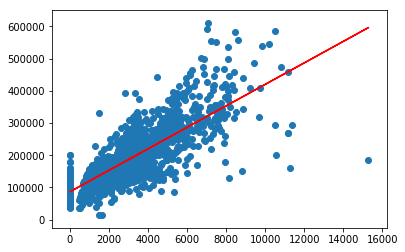

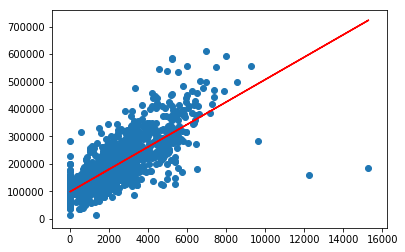

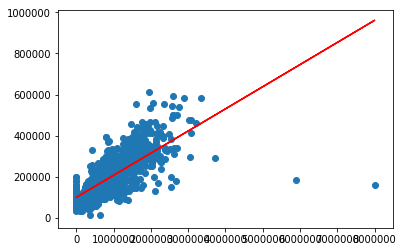

In [1571]:
corr_num = train.loc[:, ['Garage Cars Gr Liv Area', 'Garage Cars Total Bsmt SF', 'Garage Area Gr Liv Area']]

for i in corr_num.columns:
    fig = plt.figure()
    ax = plt.axes()
    X = corr_num[i]
    y = y_train
    slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)
    line = slope*X + intercept
    ax.plot(X, line, c='r')
    ax.scatter(x=X, y=y)

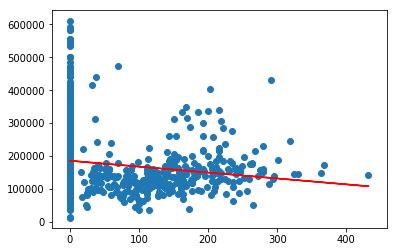

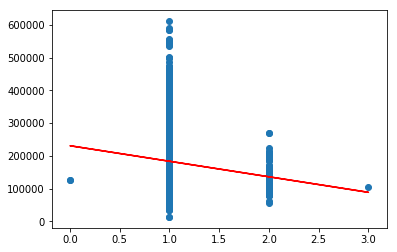

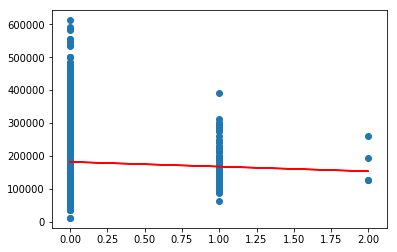

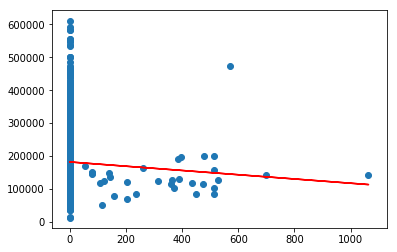

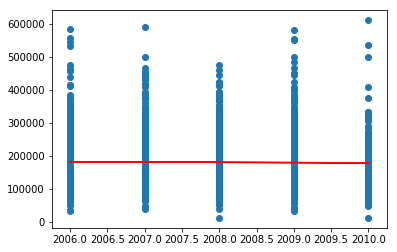

In [1572]:
# top negative correlations
corr_num = train.loc[:, ['Enclosed Porch', 'Kitchen AbvGr', 'Bsmt Half Bath', 'Low Qual Fin SF', 'Yr Sold']]

for i in corr_num.columns:
    fig = plt.figure()
    ax = plt.axes()
    X = corr_num[i]
    y = y_train
    slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)
    line = slope*X + intercept
    ax.plot(X, line, c='r')
    ax.scatter(x=X, y=y)

#### Conclusion:

We can see that most of the negative correlated features have extremely low correlation to sale price.  Year sold, for example, has almost no effect on the sale price.  We would accept the null hypothesis for this feature: the feature has no significant effect on the price of the home.  The most correlated continuous features are positively correlated.

### Correlation Comparison - Categorical

Next we will use box plots to review categorical data comparisons to sale price.  There are a few interesting finds, such as confirming that 'Overall Qual' has a linear ordered relationship to the sale price.  'Overall Cond', however, doesn't show such a strong connection.  Condition of 5 has a fairly high mean, and many high-value outliers.

<Figure size 864x360 with 0 Axes>

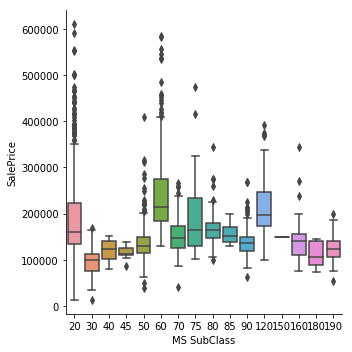

<Figure size 864x360 with 0 Axes>

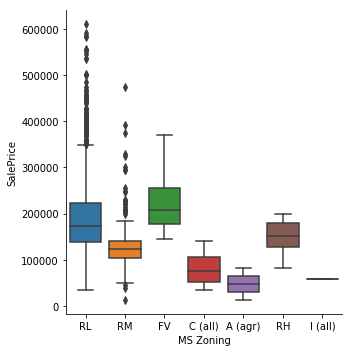

<Figure size 864x360 with 0 Axes>

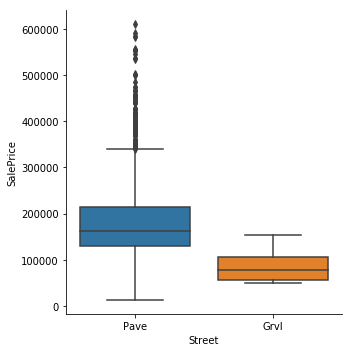

<Figure size 864x360 with 0 Axes>

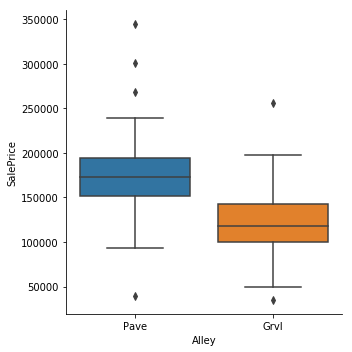

<Figure size 864x360 with 0 Axes>

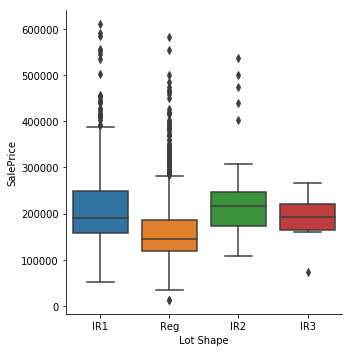

<Figure size 864x360 with 0 Axes>

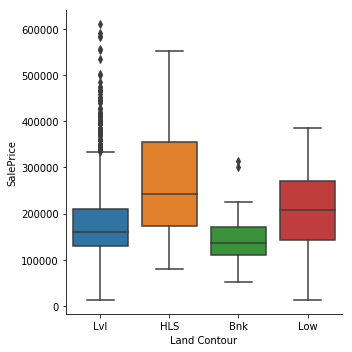

<Figure size 864x360 with 0 Axes>

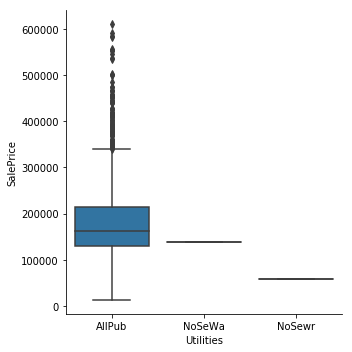

<Figure size 864x360 with 0 Axes>

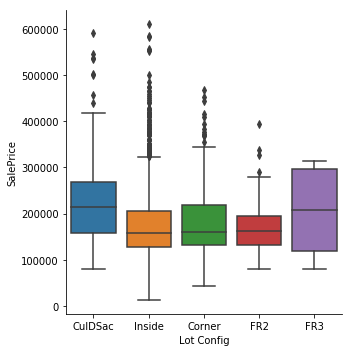

<Figure size 864x360 with 0 Axes>

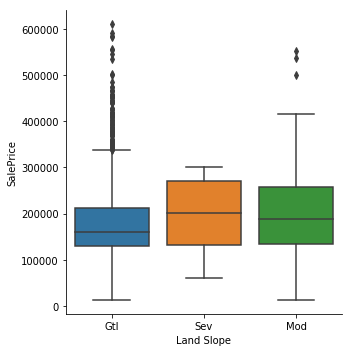

<Figure size 864x360 with 0 Axes>

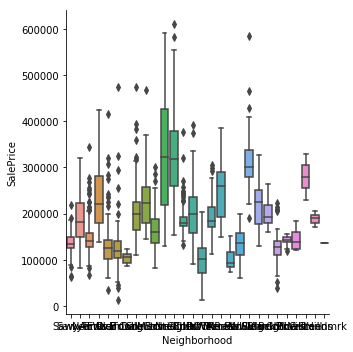

<Figure size 864x360 with 0 Axes>

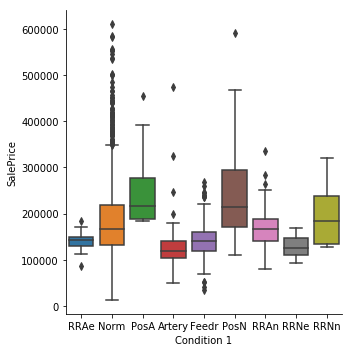

<Figure size 864x360 with 0 Axes>

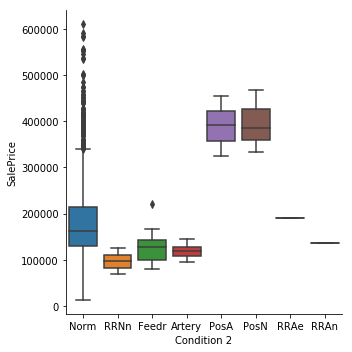

<Figure size 864x360 with 0 Axes>

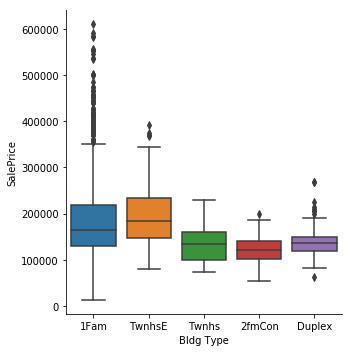

<Figure size 864x360 with 0 Axes>

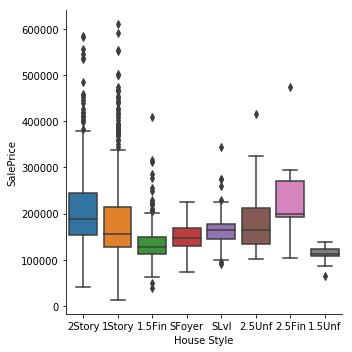

<Figure size 864x360 with 0 Axes>

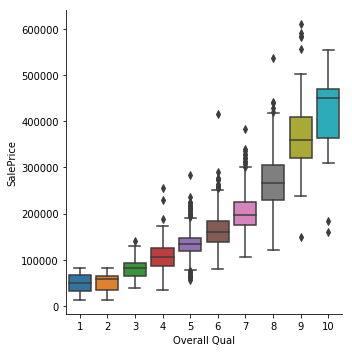

<Figure size 864x360 with 0 Axes>

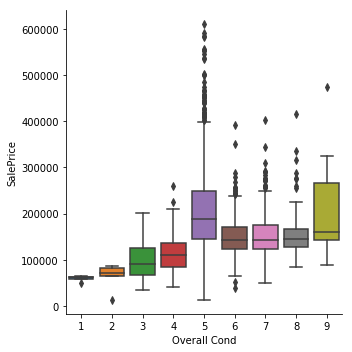

<Figure size 864x360 with 0 Axes>

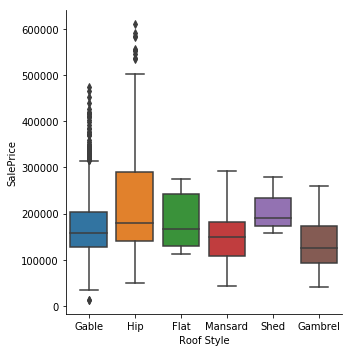

<Figure size 864x360 with 0 Axes>

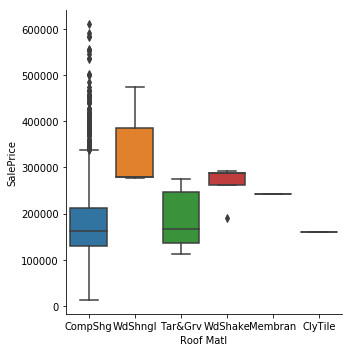

<Figure size 864x360 with 0 Axes>

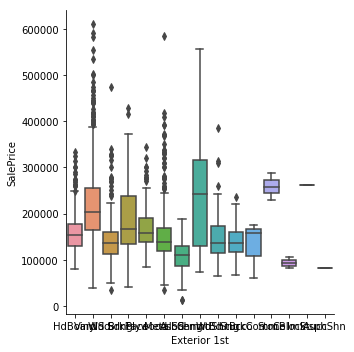

<Figure size 864x360 with 0 Axes>

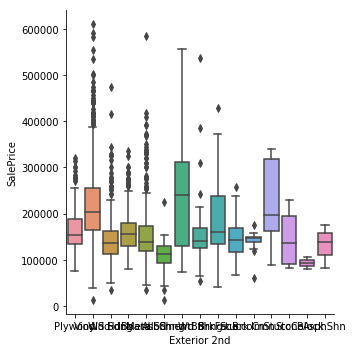

<Figure size 864x360 with 0 Axes>

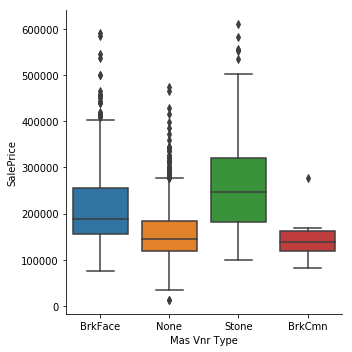

<Figure size 864x360 with 0 Axes>

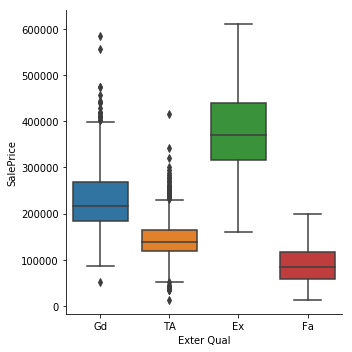

<Figure size 864x360 with 0 Axes>

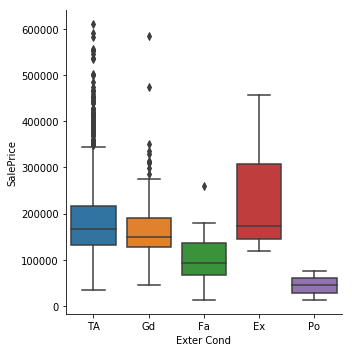

<Figure size 864x360 with 0 Axes>

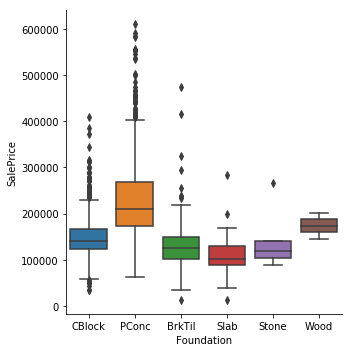

<Figure size 864x360 with 0 Axes>

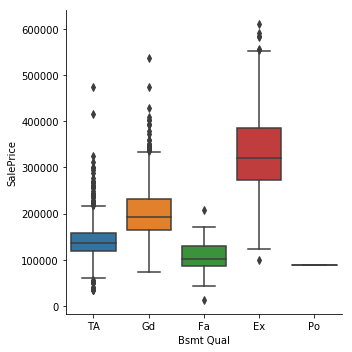

<Figure size 864x360 with 0 Axes>

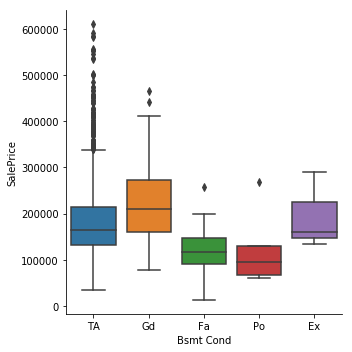

<Figure size 864x360 with 0 Axes>

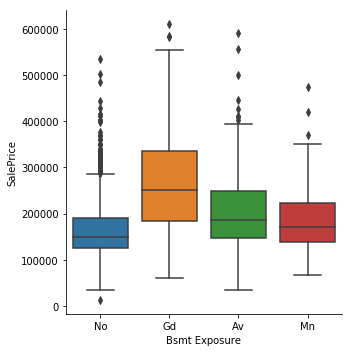

<Figure size 864x360 with 0 Axes>

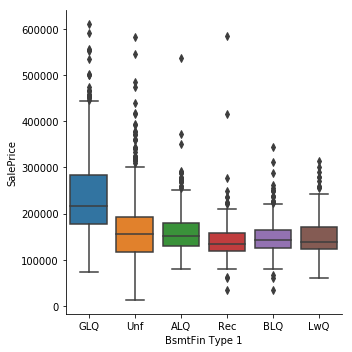

<Figure size 864x360 with 0 Axes>

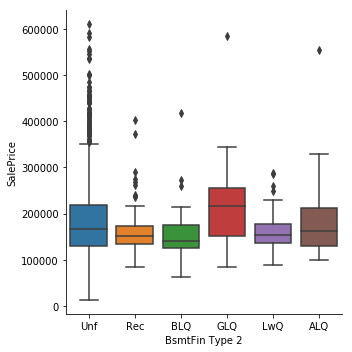

<Figure size 864x360 with 0 Axes>

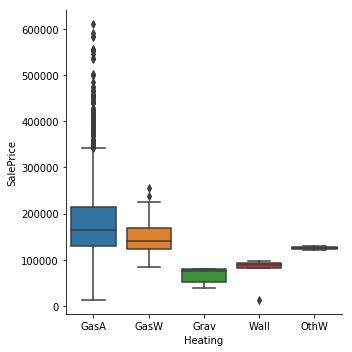

<Figure size 864x360 with 0 Axes>

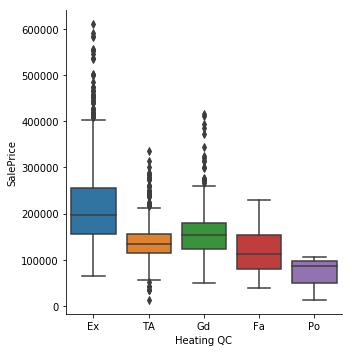

<Figure size 864x360 with 0 Axes>

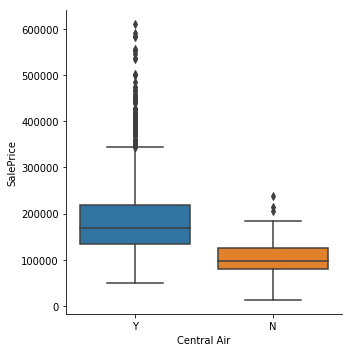

<Figure size 864x360 with 0 Axes>

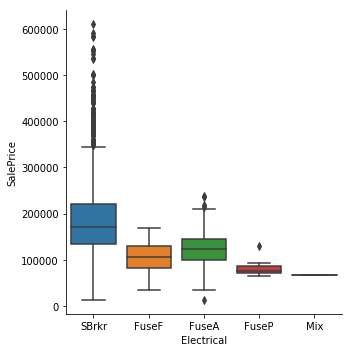

<Figure size 864x360 with 0 Axes>

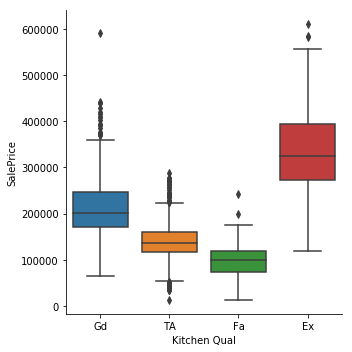

<Figure size 864x360 with 0 Axes>

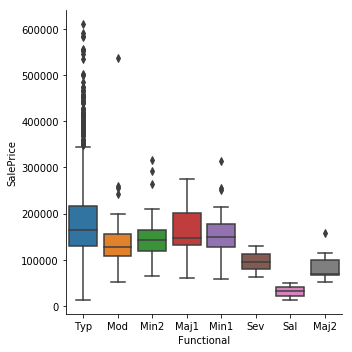

<Figure size 864x360 with 0 Axes>

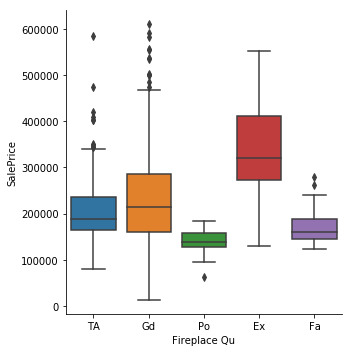

<Figure size 864x360 with 0 Axes>

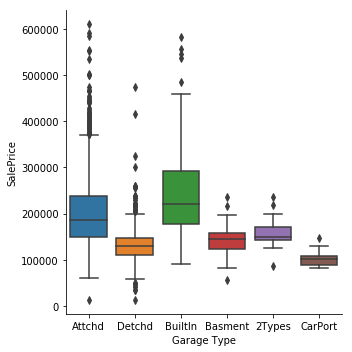

<Figure size 864x360 with 0 Axes>

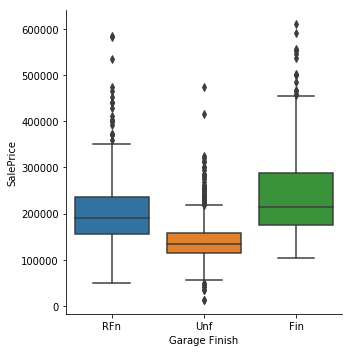

<Figure size 864x360 with 0 Axes>

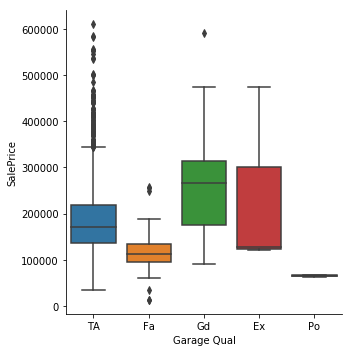

<Figure size 864x360 with 0 Axes>

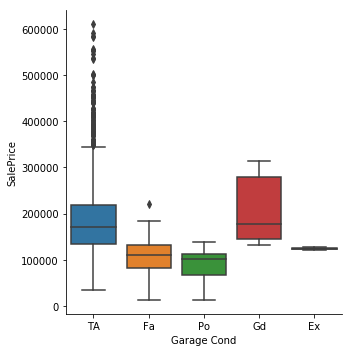

<Figure size 864x360 with 0 Axes>

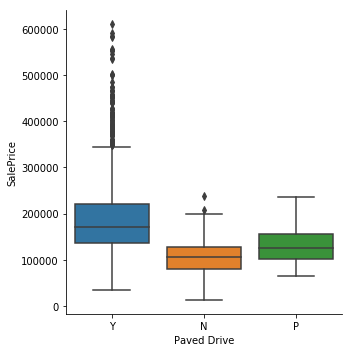

<Figure size 864x360 with 0 Axes>

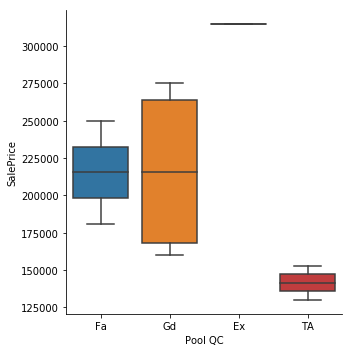

<Figure size 864x360 with 0 Axes>

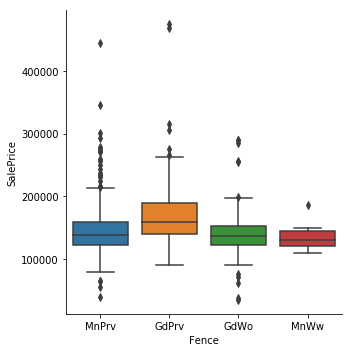

<Figure size 864x360 with 0 Axes>

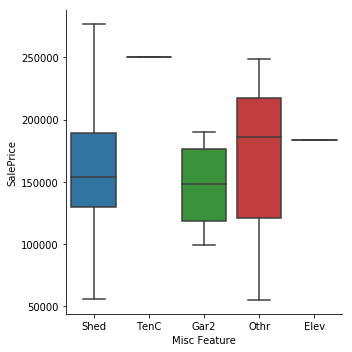

<Figure size 864x360 with 0 Axes>

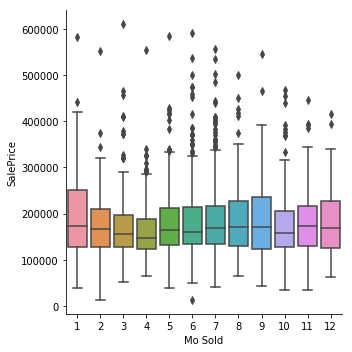

<Figure size 864x360 with 0 Axes>

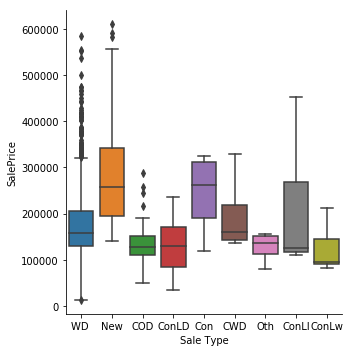

<Figure size 864x360 with 0 Axes>

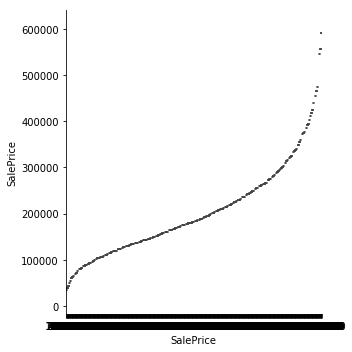

In [1573]:
# get list of columns that are object type
cat_only = train.select_dtypes(include= ['object'])
cat_only['SalePrice'] = y_train

# create box plots for them
for i in cat_only:
    X = i
    y = 'SalePrice'
    plt.figure(figsize=(12,5))
    plt.tight_layout()
    sns.catplot(x=X, y=y, kind="box", data=cat_only);

## Feature Scaling

Numeric values will be scaled with scikit's StandardScaler.

In [1574]:
# create another merged dataset
df_merged = pd.concat([train, test], axis = 0, sort=False)
df_merged_num = df_merged.select_dtypes(include = ['int64', 'float64'])
y_temp = df_merged_num['SalePrice'].copy()
id_temp = test['Id'].copy()
df_merged_num.drop(columns = ['SalePrice', 'Id'], axis = 1, inplace=True)

In [1575]:
df_merged.shape

(2930, 100)

In [1576]:
train.shape

(2051, 99)

In [1577]:
test.shape

(879, 100)

In [1578]:
scaler = StandardScaler()
scaler.fit(df_merged_num)
df_merged_num_scaled = scaler.transform(df_merged_num)

df_merged_num_scaled = pd.DataFrame(data = df_merged_num_scaled, columns = df_merged_num.columns, index = df_merged_num.index)

In [1579]:
df_merged_num_scaled.head()

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,2nd Flr SF,Low Qual Fin SF,...,TotRms AbvGrd Total Bsmt SF,TotRms AbvGrd 1st Flr SF,TotRms AbvGrd Bedroom AbvGr,TotRms AbvGrd TotRms AbvGrd,Total Bsmt SF 1st Flr SF,Total Bsmt SF Bedroom AbvGr,Total Bsmt SF TotRms AbvGrd,1st Flr SF Bedroom AbvGr,1st Flr SF TotRms AbvGrd,Bedroom AbvGr TotRms AbvGrd
0,-1.721152,0.427620,0.153560,0.994089,1.052065,0.198726,-0.293918,-0.835268,0.977170,-0.101005,...,-0.625125,-0.819440,-0.130955,-0.355189,-0.688657,-0.522440,-0.625125,-0.723724,-0.819440,-0.130955
1,-0.437329,0.170597,0.814931,0.610520,0.173026,0.427042,-0.293918,-0.644127,2.039453,-0.101005,...,0.080090,-0.099329,1.317746,0.890204,-0.433658,0.390964,0.080090,0.190472,-0.099329,1.317746
2,0.309079,-0.282525,-0.607017,1.089982,-0.566039,0.633405,-0.293918,-0.530353,-0.783185,-0.101005,...,-0.401911,-0.591511,-0.441391,-0.844451,-0.198752,0.093505,-0.401911,-0.107246,-0.591511,-0.441391
3,0.458361,-0.043906,1.145617,1.089982,-0.566039,-0.971394,-0.293918,-0.398374,0.851097,-0.101005,...,-1.021898,-0.610281,0.179481,0.223029,-0.887334,-1.155082,-1.021898,-0.688444,-0.610281,0.179481
4,0.727068,0.518752,-2.359651,0.418735,-0.566039,-0.971394,-0.293918,0.266069,0.650314,-0.101005,...,-0.695312,-0.664399,-0.130955,-0.355189,-0.658738,-0.613348,-0.695312,-0.526897,-0.664399,-0.130955


## Categorical Data Replacement

Categorical data needs to be replaced with numerical data so it can be interpreted into the regression.  Ordinal data must first be categorized, otherwise the replacement numbers will be arbitrary and lose their inherent meaning (kitchen quality poor, fair, normal, good, etc).  Ordinal data will be scaled as with all other numercial features.

Not all have clear progession - as noted before when we examined the box plots.  This could be a potential source of error in the production model.

In [1580]:
# categorical data only
df_merged_cat = df_merged.select_dtypes(include = ['object']).astype('category')

# manual updates of all categorical data that has a meaningful order
df_merged_cat.Street.replace(to_replace = ['Grvl', 'Pave'], value = [0, 1], inplace = True)
df_merged_cat.Alley.replace(to_replace = [np.NaN, 'Grvl', 'Pave'], value = [0, 0, 1], inplace = True)
df_merged_cat.Utilities.replace(to_replace = ['NoSeWa', 'NoSewr', 'AllPub'], value = [0, 1, 2], inplace = True)
df_merged_cat['Exter Qual'].replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat['Exter Cond'].replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat['Bsmt Qual'].replace(to_replace = [np.NaN, 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 0, 1, 2, 3, 4], inplace = True)
df_merged_cat['Bsmt Cond'].replace(to_replace = [np.NaN, 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 0, 1, 2, 3, 4], inplace = True)
df_merged_cat['Bsmt Exposure'].replace(to_replace = [np.NaN, 'No', 'Mn', 'Av', 'Gd'], value = [0, 0, 1, 2, 3], inplace = True)
df_merged_cat['Heating QC'].replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat['Central Air'].replace(to_replace = ['N', 'Y'], value = [0, 1], inplace = True)
df_merged_cat['Kitchen Qual'].replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat['Fireplace Qu'].replace(to_replace = ['Po', np.NaN, 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 0, 1, 2, 3, 4], inplace = True)
df_merged_cat['Garage Finish'].replace(to_replace = [np.NaN, 'Unf', 'RFn', 'Fin'], value = [0, 0, 1, 2], inplace = True)
df_merged_cat['Garage Qual'].replace(to_replace = [np.NaN, 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 0, 1, 2, 3, 4], inplace = True)
df_merged_cat['Garage Cond'].replace(to_replace = [np.NaN, 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 0, 1, 2, 3, 4], inplace = True)
df_merged_cat['Paved Drive'].replace(to_replace = ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
df_merged_cat['Pool QC'].replace(to_replace = [np.NaN, 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [2, 0, 1, 2, 3, 4], inplace = True)


In [1581]:
# OverallQual and OverallCond were object encoded, return them to ints
df_merged_cat.loc[:, ['Overall Qual', 'Overall Cond']] = df_merged_cat.loc[:, ['Overall Qual', 'Overall Cond']].astype('int64')


In [1582]:
# Extract label encoded
df_merged_label_encoded = df_merged_cat.select_dtypes(include = ['int64'])

In [1583]:
df_merged_label_encoded.head()

,Street,Alley,Utilities,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,Heating QC,Central Air,Kitchen Qual,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC
0,1,0,2,6,8,3,2,2,2,0,4,1,3,0,1,2,2,2,2
1,1,0,2,7,5,3,2,3,2,0,4,1,3,2,1,2,2,2,2
2,1,0,2,5,7,2,3,2,2,0,2,1,3,0,0,2,2,2,2
3,1,0,2,5,5,2,2,3,2,0,3,1,2,0,2,2,2,2,2
4,1,0,2,6,8,2,2,1,3,0,2,1,2,0,0,2,2,0,2


In [1584]:
scaler = StandardScaler()
scaler.fit(df_merged_label_encoded)
df_merged_label_encoded_scaled = scaler.transform(df_merged_label_encoded)

df_merged_label_encoded_scaled = pd.DataFrame(data = df_merged_label_encoded_scaled, columns = df_merged_label_encoded.columns, index = df_merged_label_encoded.index)



In [1585]:
df_merged_label_encoded = df_merged_label_encoded_scaled

### One Hot Encoding

Now, the categorical data will be replaced with dummy variables.

In [1586]:
df_merged_one_hot = df_merged_cat.select_dtypes(include = ['category'])
df_merged_one_hot = pd.get_dummies(df_merged_one_hot, dummy_na=False, drop_first=True)

In [1587]:
# join the one hot encoded dataframe with the label encoded dataframe
df_merged_encoded = pd.concat([df_merged_one_hot, df_merged_label_encoded], axis = 1)

In [1588]:
# join categorical and numerival features back together
df_merged_processed = pd.concat([df_merged_num_scaled, df_merged_encoded], axis = 1)

In [1589]:
df_merged_processed.head()

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,2nd Flr SF,Low Qual Fin SF,...,Bsmt Exposure,Heating QC,Central Air,Kitchen Qual,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC
0,-1.721152,0.427620,0.153560,0.994089,1.052065,0.198726,-0.293918,-0.835268,0.977170,-0.101005,...,-0.629356,0.887886,0.26775,0.737105,-0.938966,0.275654,0.283689,0.271216,0.314379,-0.039418
1,-0.437329,0.170597,0.814931,0.610520,0.173026,0.427042,-0.293918,-0.644127,2.039453,-0.101005,...,-0.629356,0.887886,0.26775,0.737105,0.556642,0.275654,0.283689,0.271216,0.314379,-0.039418
2,0.309079,-0.282525,-0.607017,1.089982,-0.566039,0.633405,-0.293918,-0.530353,-0.783185,-0.101005,...,-0.629356,-1.200000,0.26775,0.737105,-0.938966,-0.944386,0.283689,0.271216,0.314379,-0.039418
3,0.458361,-0.043906,1.145617,1.089982,-0.566039,-0.971394,-0.293918,-0.398374,0.851097,-0.101005,...,-0.629356,-0.156057,0.26775,-0.771078,-0.938966,1.495694,0.283689,0.271216,0.314379,-0.039418
4,0.727068,0.518752,-2.359651,0.418735,-0.566039,-0.971394,-0.293918,0.266069,0.650314,-0.101005,...,-0.629356,-1.200000,0.26775,-0.771078,-0.938966,-0.944386,0.283689,0.271216,-3.414896,-0.039418


## Final Data Preparation

1. Split back into train/test datasets
2. Ensure data has correct shape and correct values
3. Save to new CSV

In [1590]:
# split the train/test dataframes back into each other
df_train = df_merged_processed.iloc[:2051, :]#.drop(columns = ['PID'], axis = 1)
df_test = df_merged_processed.iloc[2051:, :]#.drop(columns = ['SalePrice', 'PID'], axis = 1)

In [1591]:
df_test['Id'] = id_backup

In [1592]:
y_temp.shape

(2930,)

In [1593]:
df_train.shape

(2051, 267)

In [1594]:
y_temp = y_temp[:2051]

In [1595]:
df_train['SalePrice'] = y_temp.values

In [1596]:
df_train.to_csv('../datasets/train_final.csv')
df_test.to_csv('../datasets/test_final.csv')